<a href="https://colab.research.google.com/github/vaibhavsinghmq/datascience/blob/main/projects/Project_EDA_whatsapp_chat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#
#Objectives
#1.Total number of messages
#2. Total words
#3. Number of Media and links shared
#4. Monthly and Daily Timeline: Chat activity on a daily basis and on a monthly basis.
#5. Most busy day and month – In a week which day outperforms the best, and in a year, which month includes the most conversations?
#6. Weekly activity map
#7. Most Busy Users
#8. Top and common words in conversation
#9. Emoji analysis
#

In [2]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 7.5 MB/s eta 0:00:00


In [3]:
!pip install wordcloud

In [4]:
# imports

import re
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
input_file_path = '_chat.txt'  # Replace with the path to your input file
output_file_path = 'chat_without_u200e.txt'  # Replace with the desired output file path

with open(input_file_path, 'r', encoding='utf-8') as file:
    content = file.read()

# Remove the [U+200E] character from the content
content_without_u200e = content.replace('\u200E', '')

with open(output_file_path, 'w', encoding='utf-8') as file:
    file.write(content_without_u200e)

print(f"Removed [U+200E] character and saved to {output_file_path}")

Removed [U+200E] character and saved to chat_without_u200e.txt


In [6]:
output_M_path="chat1.txt"
def check_line(line):
    pattern = r'^\s*\[\d{1,2}/\d{1,2}/\d{4}, \d{1,2}:\d{2}:\d{2}\]'
    return re.match(pattern, line) is not None


def has_special_characters(line):
    for char in line:
        if ord(char) < 32 or ord(char) > 127:
            return True
    return False

file_path = 'chat_without_u200e.txt'  # Replace with the path to your text file

merged_lines = []
current_line = ""

with open(file_path, 'r', encoding='utf-8') as file:
    for line_number, line in enumerate(file, start=1):
        line = line.strip()

        if check_line(line):
            #print(line,"--Valid")
            if current_line:
                merged_lines.append(current_line)
            current_line = line
        else:
            #print(line,"--InValid")
            current_line += " " + line

if current_line:
    merged_lines.append(current_line)

with open(output_M_path, 'w', encoding='utf-8') as output_file:
    for idx, merged_line in enumerate(merged_lines, start=1):
        output_file.write(f"{merged_line}\n")

In [7]:
file_path = 'chat1.txt'  # Replace with the path to your chat1.txt file

# Read the data from the file
with open(file_path, 'r', encoding='utf-8') as file:
    data = file.read()

# Extract data from the lines using regular expressions
pattern = r'\[(.*?)\] (.*?): (.*?)\n'
matches = re.findall(pattern, data)

# Create lists for each column
chat_timestamps = [match[0] for match in matches]
users = [match[1] for match in matches]
messages = [match[2] for match in matches]

# Create a Pandas DataFrame
columns = ['chat_timestamp', 'user', 'message']
df = pd.DataFrame(list(zip(chat_timestamps, users, messages)), columns=columns)


In [8]:
df.shape

(11020, 3)

In [9]:
df.head()

,chat_timestamp,user,message
0,"19/10/2022, 14:07:22",Gvaaay (NSFW),Messages and calls are end-to-end encrypted. N...
1,"19/10/2022, 14:07:22",Yash Parihar,Yash Parihar created this group
2,"19/10/2022, 14:07:22",Gvaaay (NSFW),You were added
3,"26/10/2022, 00:33:35",Yash Parihar,64 simply noodles 120 bws 46 Woolworths 12 pen...
4,"26/10/2022, 12:43:05",Vaibhav,@61452651009 its your area mate


In [10]:
df.tail()

,chat_timestamp,user,message
11015,"17/8/2023, 16:26:02",Malaika Arora,Damnnnn
11016,"17/8/2023, 18:09:17",garv,image omitted
11017,"17/8/2023, 18:09:50",garv,I know he'll be useless most likely
11018,"17/8/2023, 18:09:51",Yash Parihar,🔥
11019,"17/8/2023, 18:10:03",garv,But it's fuckkkkkkkingg exciting


In [11]:
filtered_df = df.loc[df['message'].str.contains("damn i now have 104$ coming")]
print(filtered_df)

Empty DataFrame
Columns: [chat_timestamp, user, message]
Index: []


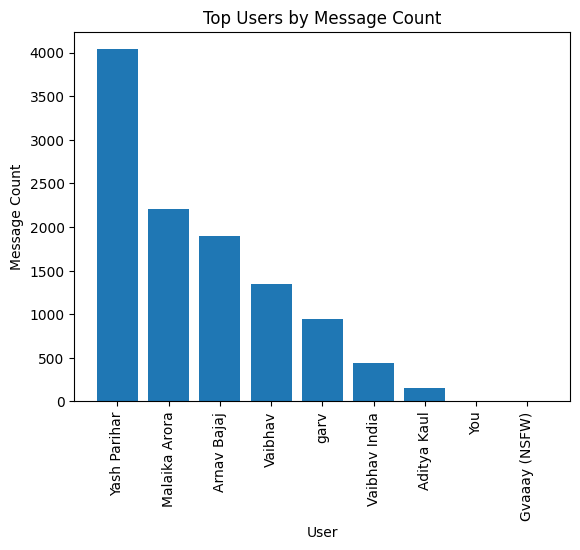

In [12]:
# Set a custom header
custom_header = "Messages shared in group by user"
df.columns = [custom_header, "user", "message"]

# Generate a bar plot
x = df['user'].value_counts()
user_names = x.index
msg_count = x.values

plt.bar(user_names, msg_count)
plt.xticks(rotation='vertical')
plt.xlabel("User")
plt.ylabel("Message Count")
plt.title("Top Users by Message Count")
plt.yticks(range(0, max(msg_count) + 1, 500))  # Set y-axis ticks in intervals of 100
plt.show()

In [13]:
df[df['user']=='Aditya Kaul'].shape

(153, 3)

In [14]:
import emoji
from collections import Counter

emojis = []
user_emoticon = []
for user, message in zip(df['user'], df['message']):
  emojis.extend([c for c in message if c in emoji.EMOJI_DATA])
  for m_c in message:
    if m_c in emoji.EMOJI_DATA:
        user_emoticon.append(user)

In [15]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,😂,815
1,💯,100
2,🤣,46
3,🤘,42
4,🏻,39
...,...,...
81,🤞,1
82,🔪,1
83,👑,1
84,💩,1


In [16]:
print("Emoticons shared by users in decending order:")
pd.DataFrame(Counter(user_emoticon).most_common(len(Counter(user_emoticon))))

Emoticons shared by users in decending order:


,0,1
0,Malaika Arora,842
1,Arnav Bajaj,213
2,Yash Parihar,144
3,garv,101
4,Aditya Kaul,62
5,Vaibhav,58
6,Vaibhav India,20


In [17]:
df_temp = df.copy()
# Remove entries containing "omitted" from the message column
df_temp = df_temp[~df_temp['message'].str.contains('omitted', case=False)]

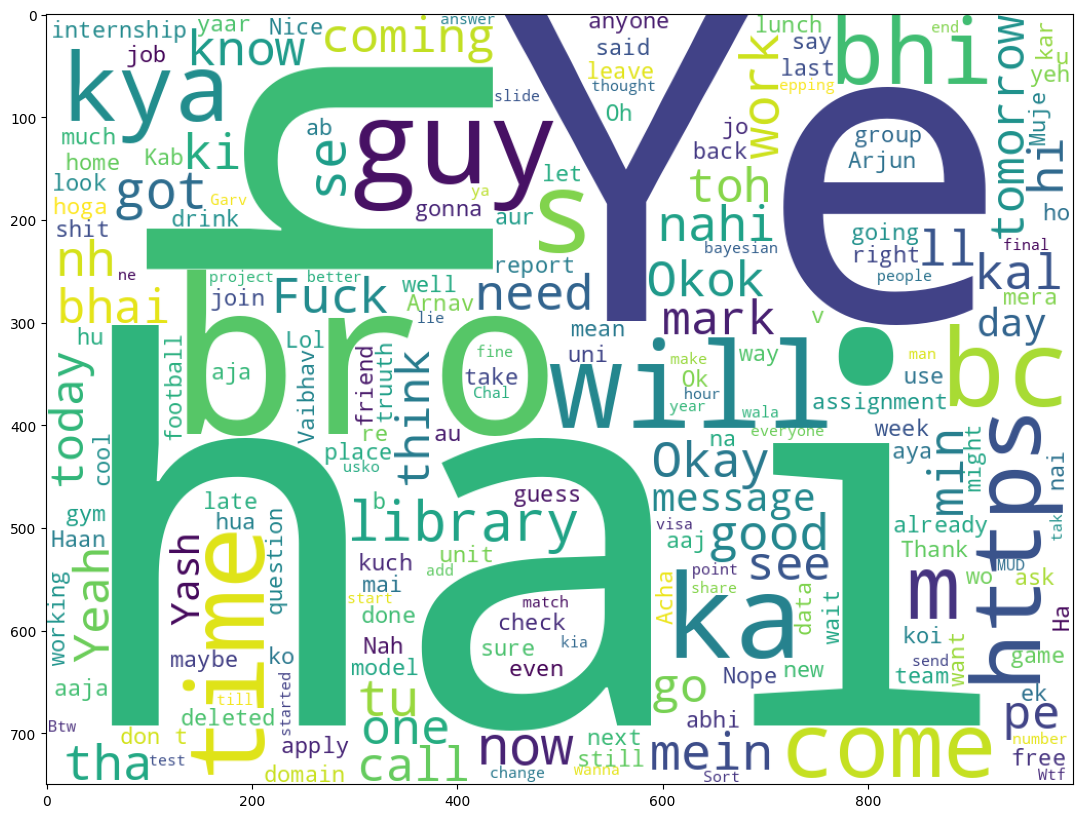

In [18]:
#Draw the wordCloud
from wordcloud import WordCloud
plt.figure(figsize=(20, 10))
wc = WordCloud(width=1000,height=750,min_font_size=10,background_color='white')
cloud = wc.generate(df_temp['message'].str.cat(sep=" "))
plt.imshow(cloud)